# Load and parse data

In [197]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
files = os.listdir('results')
files = ['results/' + f for f in files if '.json' in f]

In [199]:
results = []
for file in files:
    with open(file) as f:
        res = json.load(f)
        results.append(res)

In [200]:
df = pd.DataFrame(results)
df.sort_values('id', inplace=True)
df.head(10)

,id,description,address,neighbourhood,visits,location,size,area,build_height,elevation,volume
1354,1,Nick's parcel.,70 Block Fork\nThe Center\nOrigin City,The Center,66039,"9E,11N,",13×18 metres,234,9,0 to 9 meters,16848
1564,2,Welcome to Cryptovoxels! This build was done b...,72 Block Fork\nThe Center\nOrigin City,The Center,45086,"11W,10N,",18×15 metres,270,8,0 to 8 meters,17280
2234,3,,74 Block Fork\nThe Center\nOrigin City,The Center,25316,"14E,8S,",23×13 metres,299,13,0 to 13 meters,31096
2497,4,,75 Block Fork\nThe Center\nOrigin City,The Center,30591,"12W,12S,",21×20 metres,420,13,0 to 13 meters,43680
2809,5,,76 Block Fork\nThe Center\nOrigin City,The Center,15559,"7E,24S,",10×10 metres,100,6,0 to 6 meters,4800
335,6,,1 Buffer Crossing\nThe Center\nOrigin City,The Center,10009,"23W,10N,",7×15 metres,105,13,0 to 13 meters,10920
419,7,Supreme Leader Yetepey's NFT Station #4,69 Block Fork\nThe Center\nOrigin City,The Center,19296,"9E,27N,",13×14 metres,182,6,0 to 6 meters,8736
2301,8,,64 Addy Gardens\nThe Center\nOrigin City,The Center,6914,"27E,10N,",15×16 metres,240,8,0 to 8 meters,15360
3007,9,Yetepey's Fishtank Poker Gallery @ The Center,77 Block Fork\nThe Center\nOrigin City,The Center,11134,"12W,26S,",21×8 metres,168,13,0 to 13 meters,17472
786,10,,63 Addy Gardens\nThe Center\nOrigin City,The Center,5383,"31E,8S,",12×13 metres,156,9,0 to 9 meters,11232


# Compute overall and neighbourhood ranks

## compute ranks

In [201]:
# overall rank
df['visits_rank_overall'] = df['visits'].rank(ascending=False).astype(int)

In [202]:
# neighbourhood rank
df["visits_rank_neighbourhood"] = df.groupby("neighbourhood")["visits"].rank("dense", ascending=False).astype(int)

## show top 5 plots in each neighbourhood, ranked on visits

In [203]:
neighbourhoods = list(df['neighbourhood'].unique())

In [204]:
for neighbourhood in neighbourhoods:
    dft = df[df['neighbourhood'] == neighbourhood].sort_values('visits_rank_neighbourhood')[['id','visits','visits_rank_overall','visits_rank_neighbourhood']].head(5).reset_index()
    print(f"######################  Top 5 plots in {neighbourhood.upper()} ######################")
    print(dft)
    print("")

######################  Top 5 plots in THE CENTER  ######################
   index  id  visits  visits_rank_overall  visits_rank_neighbourhood
0   1354   1   66039                    1                          1
1   1564   2   45086                    2                          2
2   2497   4   30591                    3                          3
3   2234   3   25316                    4                          4
4    419   7   19296                    5                          5

######################  Top 5 plots in MUSIC DISTRICT  ######################
   index   id  visits  visits_rank_overall  visits_rank_neighbourhood
0   1557  131    4425                  167                          1
1   1322  309    4091                  199                          2
2    906   84    3614                  244                          3
3   1525  166    3485                  257                          4
4   2733   54    3108                  316                          5

############

######################  Top 5 plots in GANGNAM  ######################
   index    id  visits  visits_rank_overall  visits_rank_neighbourhood
0    383  2516   15092                    9                          1
1    705  2520   15018                   10                          2
2   2458  2450   12444                   16                          3
3   1904  2565   12409                   17                          4
4   2154  2590   11076                   23                          5

######################  Top 5 plots in ROME  ######################
   index    id  visits  visits_rank_overall  visits_rank_neighbourhood
0   2577  2714    5559                  109                          1
1    933  2792    4034                  205                          2
2   1665  2745    3463                  261                          3
3    520  2310    2565                  428                          4
4   2302  2667    2278                  513                          5

#######

## Show top 10 most popular streets per neighbourhood

In [205]:
# todo

# Analyze visits

## Plot overall neighbourhood popularity

Text(0.5, 0, 'neighbourhood')

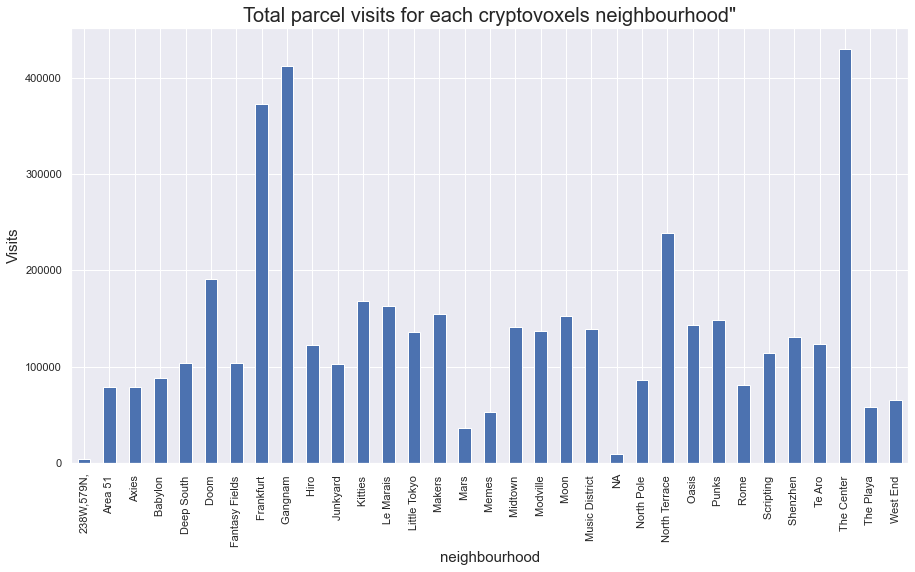

In [206]:
ax = df.groupby('neighbourhood').agg('sum')['visits'].sort_index().plot(kind="bar")
ax.set_title('Total parcel visits for each cryptovoxels neighbourhood"', fontsize=20)
ax.set_ylabel('Visits', fontsize=15)
ax.set_xlabel('neighbourhood', fontsize=15)

## Plot avearge parcel area per neighbourhood

Text(0.5, 0, 'neighbourhood')

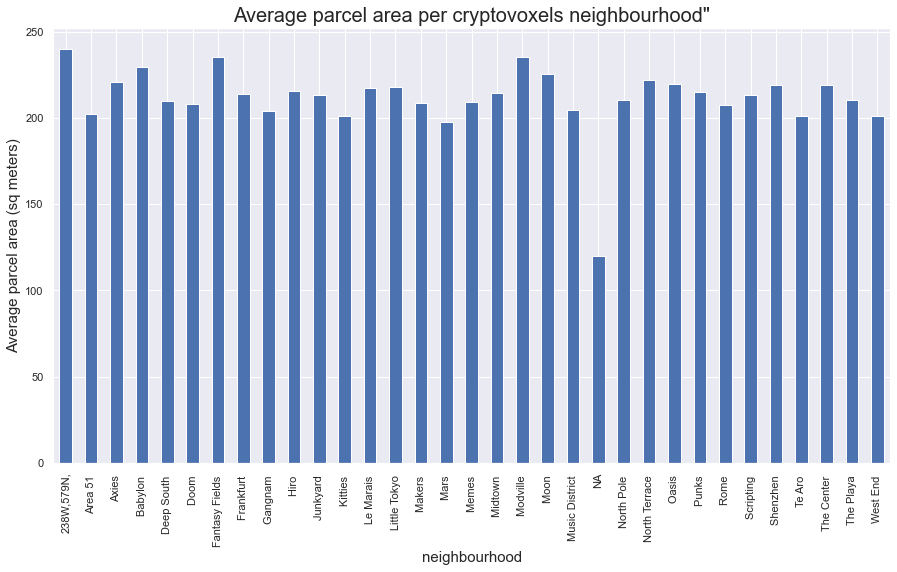

In [207]:
ax = df.groupby('neighbourhood').agg(np.mean)['area'].sort_index().plot(kind="bar")
ax.set_title('Average parcel area per cryptovoxels neighbourhood"', fontsize=20)
ax.set_ylabel('Average parcel area (sq meters)', fontsize=15)
ax.set_xlabel('neighbourhood', fontsize=15)

## Plot average parcel build height per neighbourhood

Text(0.5, 0, 'neighbourhood')

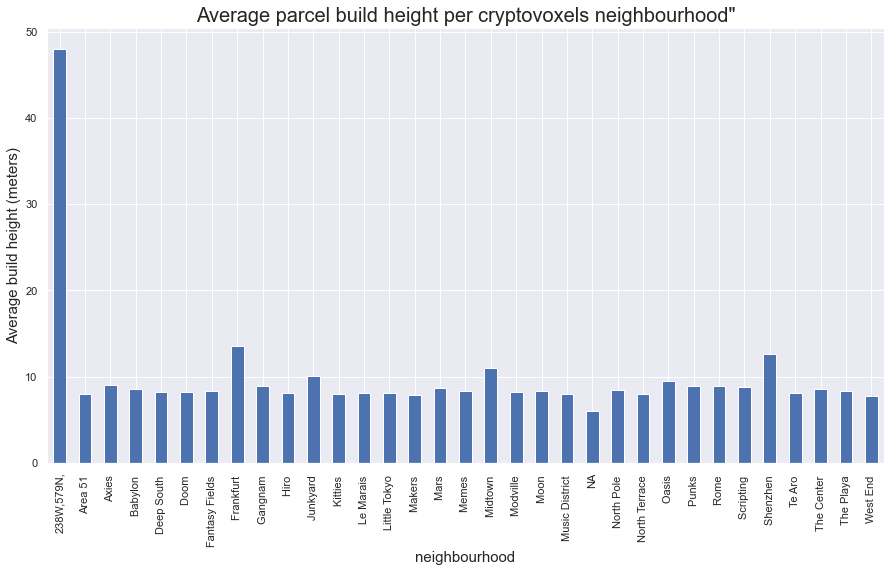

In [208]:
ax = df.groupby('neighbourhood').agg(np.mean)['build_height'].sort_index().plot(kind="bar")
ax.set_title('Average parcel build height per cryptovoxels neighbourhood"', fontsize=20)
ax.set_ylabel('Average build height (meters)', fontsize=15)
ax.set_xlabel('neighbourhood', fontsize=15)

## Plot visits vs. area

Text(0.5, 0, 'Parcel area (square meters)')

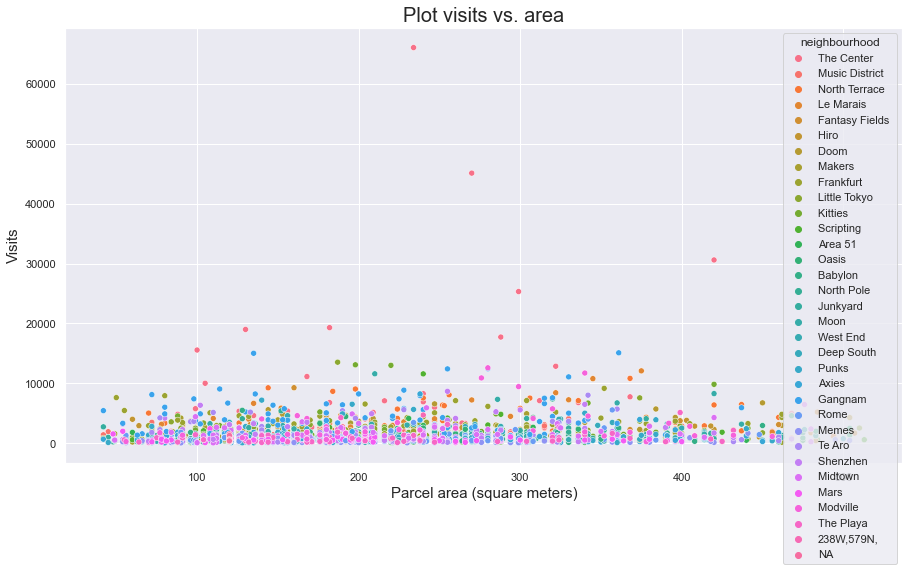

In [209]:
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.scatterplot(data=df, x="area", y="visits", hue="neighbourhood")
ax.set_title('Plot visits vs. area', fontsize=20)
ax.set_ylabel('Visits', fontsize=15)
ax.set_xlabel('Parcel area (square meters)', fontsize=15)

## Plot visits vs id (time minted)

Text(0.5, 0, 'parcel id (mint order)')

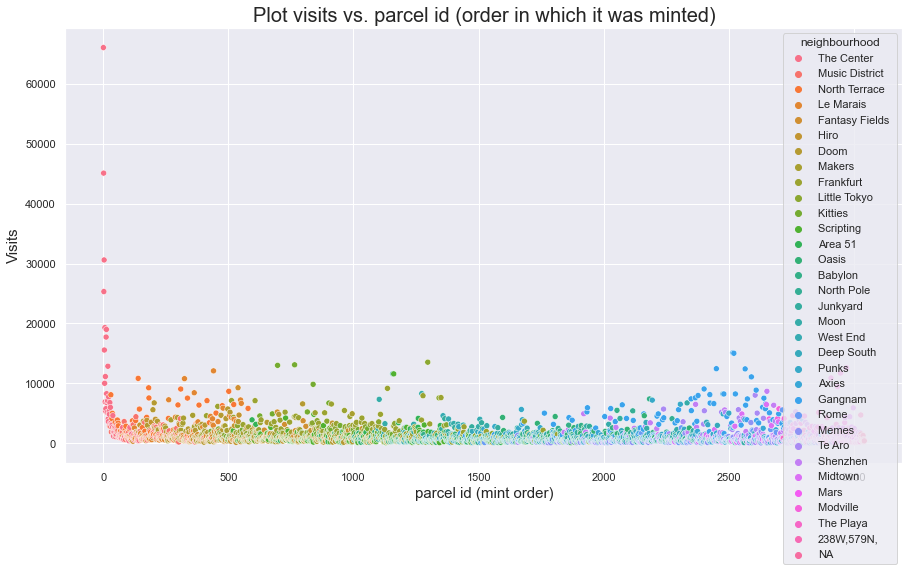

In [210]:
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.scatterplot(data=df, x="id", y="visits", hue="neighbourhood")
ax.set_title('Plot visits vs. parcel id (order in which it was minted)', fontsize=20)
ax.set_ylabel('Visits', fontsize=15)
ax.set_xlabel('parcel id (mint order)', fontsize=15)

# Write CSV output

In [79]:
import datetime

In [69]:
filename = "results_" + str(datetime.datetime.now()).split('.')[0] + '.csv'
filename = filename.replace(':','-')

'results_2020-10-13 18-28-42.csv'

In [70]:
df.to_csv(filename)